In [2]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

SEED = 123
np.random.seed(SEED)

In [3]:
raw_df = pd.read_csv('../data/raw/cc_fraud.csv')
print(raw_df.shape)

(284807, 31)


In [5]:
raw_df.head()

,timestamp,dr1,dr2,dr3,dr4,dr5,dr6,dr7,dr8,dr9,...,dr21,dr22,dr23,dr24,dr25,dr26,dr27,dr28,amt,clss
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  284807 non-null  float64
 1   dr1        284807 non-null  float64
 2   dr2        284807 non-null  float64
 3   dr3        284807 non-null  float64
 4   dr4        284807 non-null  float64
 5   dr5        284807 non-null  float64
 6   dr6        284807 non-null  float64
 7   dr7        284807 non-null  float64
 8   dr8        284807 non-null  float64
 9   dr9        284807 non-null  float64
 10  dr10       284807 non-null  float64
 11  dr11       284807 non-null  float64
 12  dr12       284807 non-null  float64
 13  dr13       284807 non-null  float64
 14  dr14       284807 non-null  float64
 15  dr15       284807 non-null  float64
 16  dr16       284807 non-null  float64
 17  dr17       284807 non-null  float64
 18  dr18       284807 non-null  float64
 19  dr19       284807 non-n

In [7]:
# check for nulls
raw_df.columns[raw_df.isna().any()].tolist()

[]

There are no null columns

In [8]:
raw_df['timestamp'].nunique()
# there are duplicated timestamps

124592

In [4]:
# check if col is sorted
all(sorted(raw_df['timestamp'].values) == raw_df['timestamp'].values)

True

There are duplicated timestamps

In [9]:
raw_df['clss'].value_counts()/len(raw_df)

0    0.998273
1    0.001727
Name: clss, dtype: float64

The 2 classes (non-fraud vs. fraud are severely imbalanced. Will need to balance the classes later

In [13]:
dr_and_amt_features = [col for col in raw_df.columns if 'timestamp' not in col and 'clss' not in col]
len(dr_and_amt_features)

29

In [14]:
dr_and_amt_features

['dr1',
 'dr2',
 'dr3',
 'dr4',
 'dr5',
 'dr6',
 'dr7',
 'dr8',
 'dr9',
 'dr10',
 'dr11',
 'dr12',
 'dr13',
 'dr14',
 'dr15',
 'dr16',
 'dr17',
 'dr18',
 'dr19',
 'dr20',
 'dr21',
 'dr22',
 'dr23',
 'dr24',
 'dr25',
 'dr26',
 'dr27',
 'dr28',
 'amt']

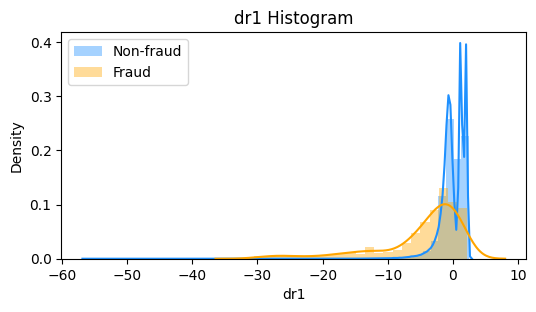

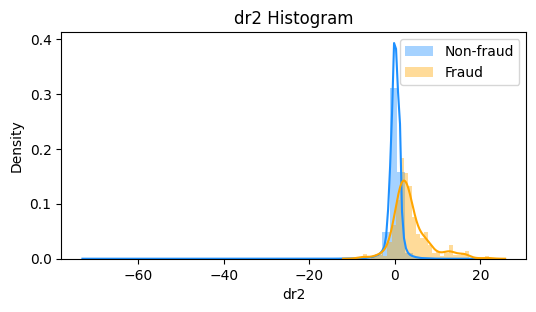

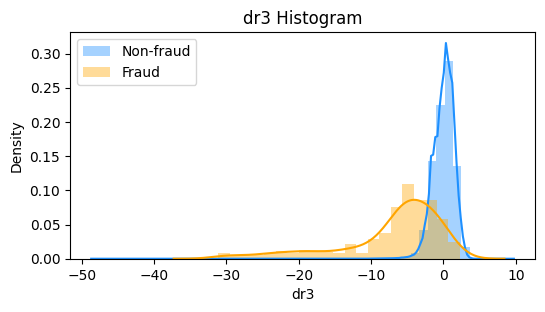

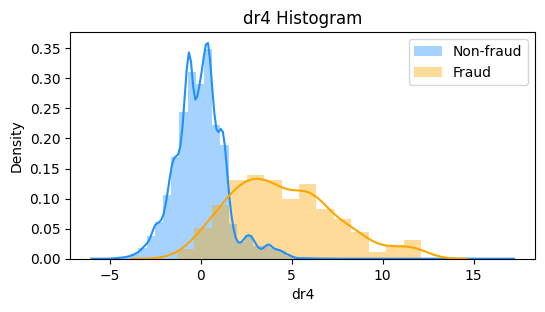

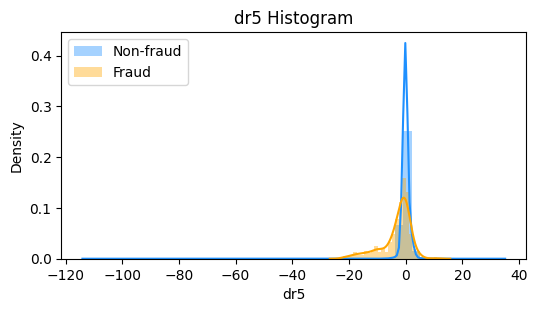

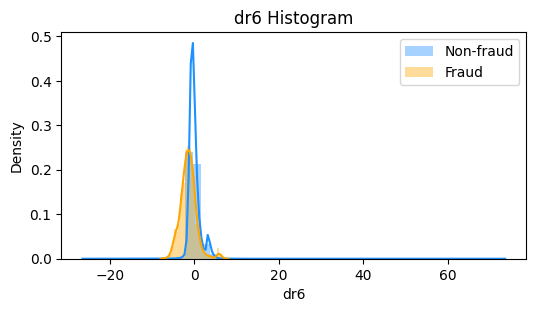

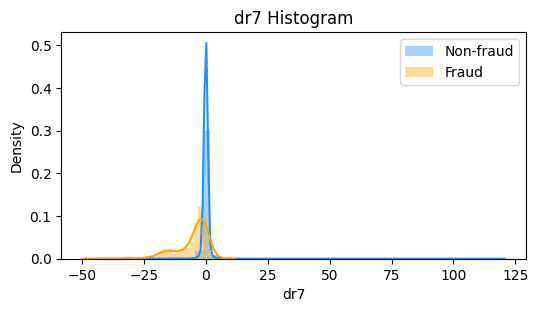

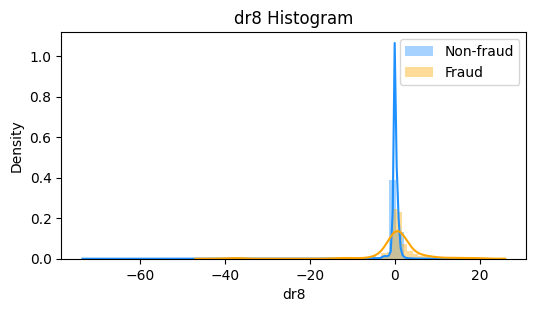

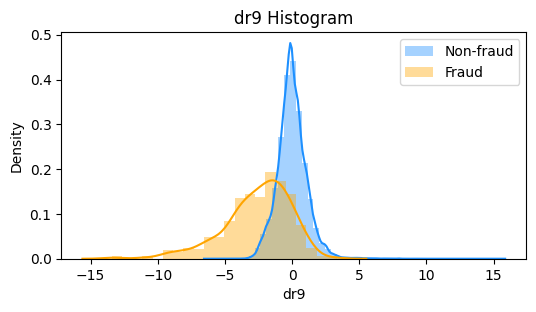

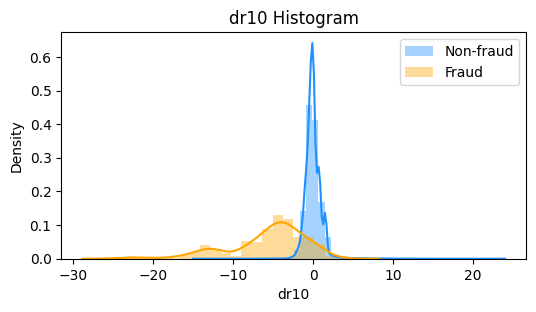

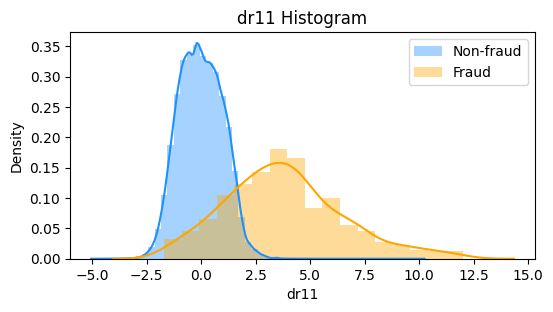

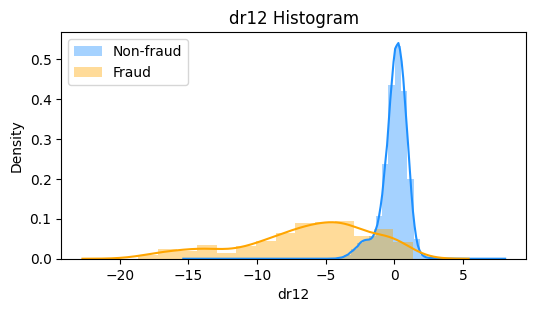

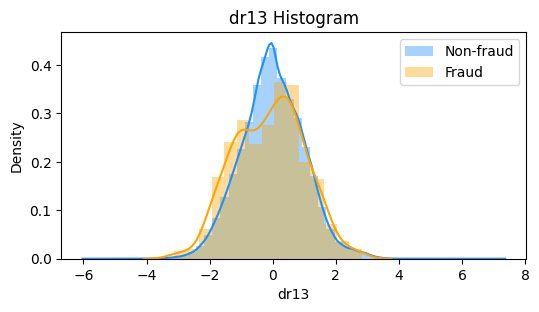

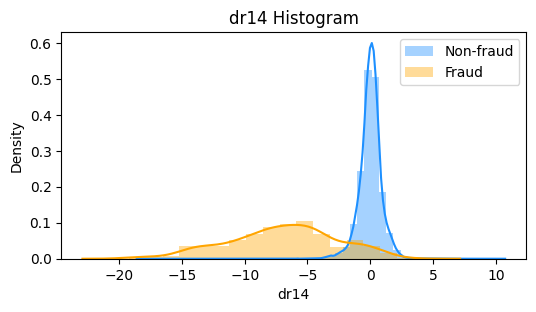

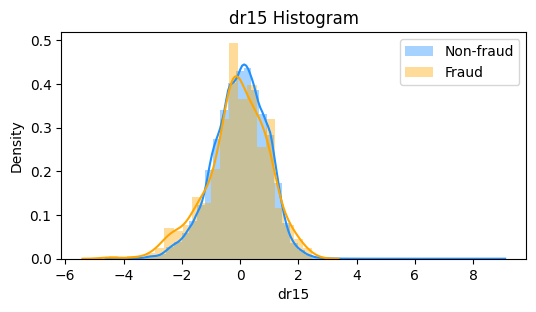

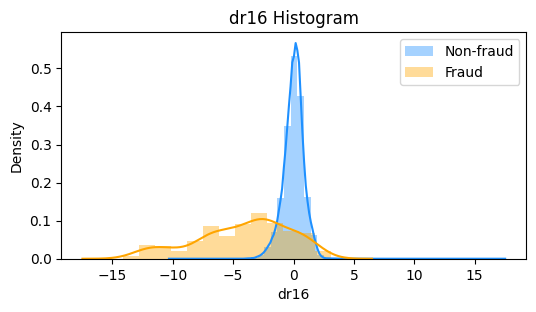

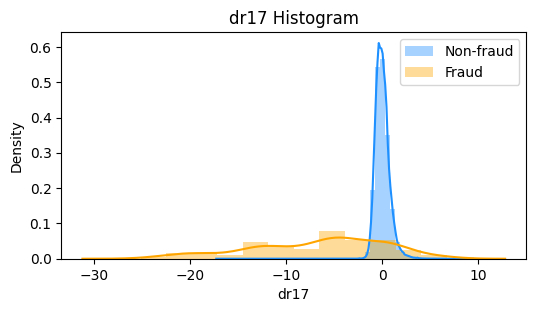

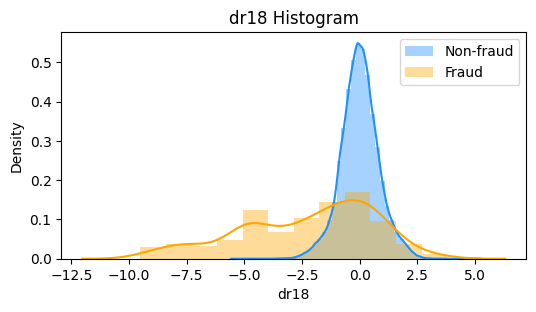

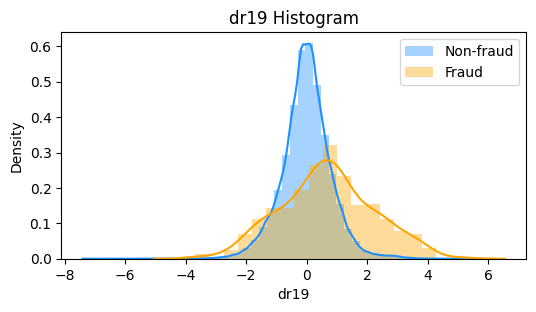

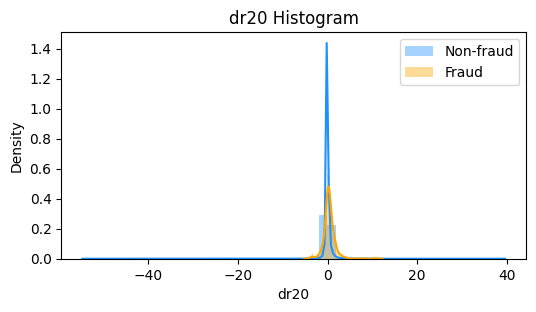

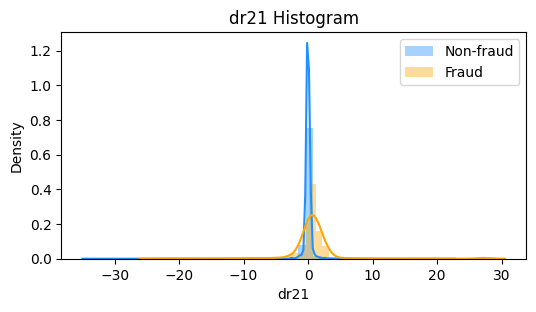

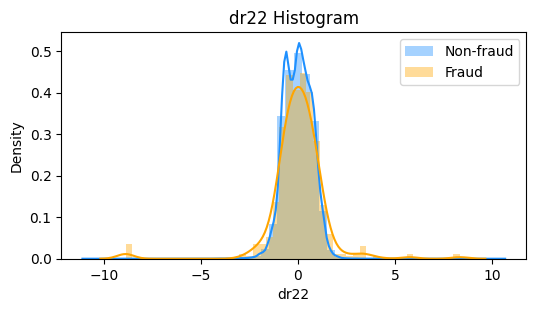

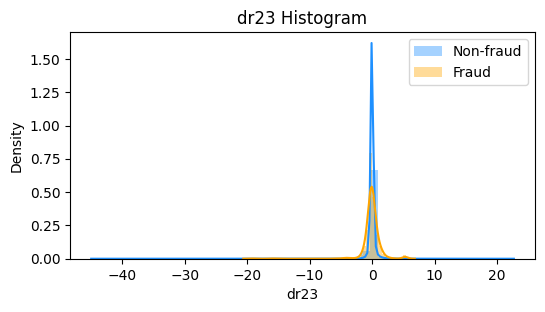

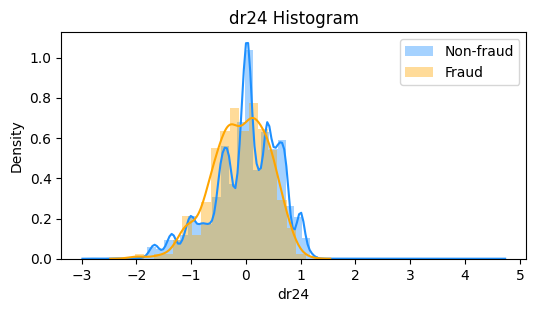

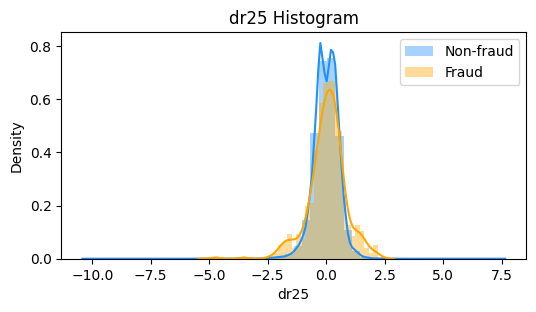

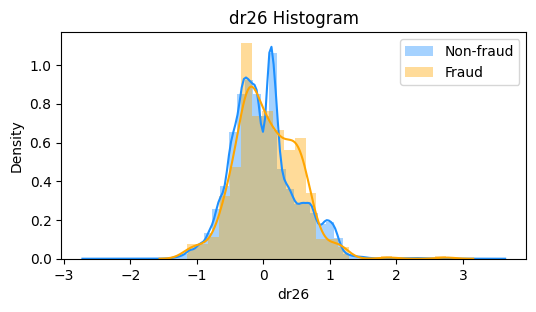

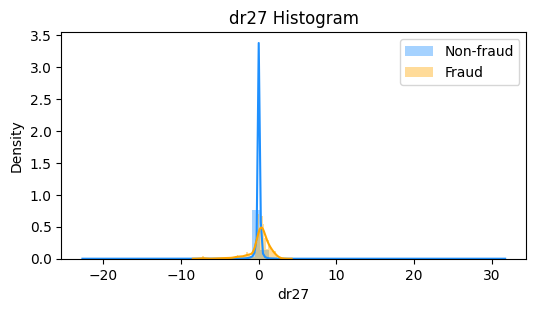

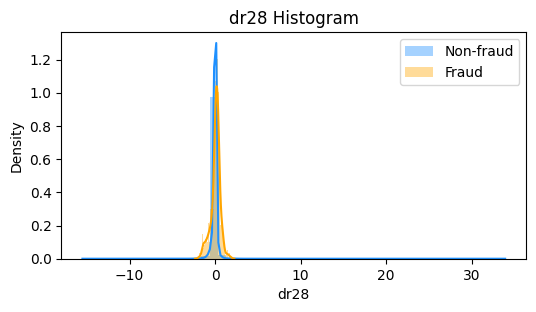

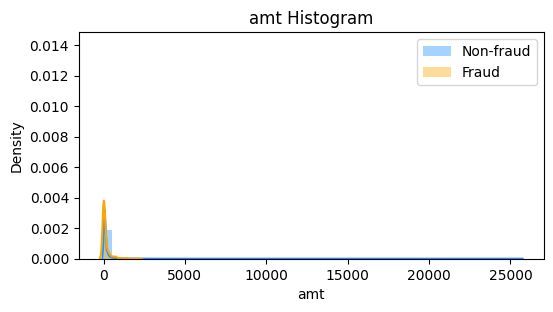

In [16]:
for col in dr_and_amt_features:
    plt.subplots(figsize=(6,3), dpi=100)
    try: 
        sns.distplot(raw_df.loc[raw_df['clss']== 0, col] , color="dodgerblue", label="Non-fraud", kde = True)
        sns.distplot(raw_df.loc[raw_df['clss']== 1, col] , color="orange", label="Fraud", kde = True)
    except:
        sns.distplot(raw_df.loc[raw_df['clss']== 0, col] , color="dodgerblue", label="Non-fraud", kde = False)
        sns.distplot(raw_df.loc[raw_df['clss']== 1, col] , color="orange", label="Fraud", kde = False)        
    
    plt.title(col + ' Histogram')
    plt.legend();


- As a feature on its own, `dr4`, `dr12` and `dr14` are able to separate both classes quite well. 
- `amt`, `dr28`, `dr27` etc are unable to do so, as the distribution for fraud and non-fraud overlaps one another.